# 2.3.2 Complex machine learning models - sklearn - random forest
# Top 3 - BELGRADE
### The following script contains the following:

#### 1. Import  libraries, additional requirements
#### 2. Import Data
#### 3. Create dictionary lists for outcome labels
#### 4. Load and split data into training/test sets
#### 5. Create random forest classifier
#### 6. Conduct feature importances analysis
        - Belgrade
---------------------------------------------------------------------------------------------------------------------------
## 1. Import  libraries, additional requirements
---------------------------------------------------------------------------------------------------------------------------

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from numpy import argmax
from sklearn import metrics  
from sklearn.tree import plot_tree
from sklearn import tree

In [4]:
# Auto-call show plots
%matplotlib inline

# Turning off warning feature
import warnings
warnings.filterwarnings('ignore')

---------------------------------------------------------------------------------------------------------------------------
## 2. Import Data

In [8]:
# Create a path for importing
path = r'C:\Users\shrav\_Data_Analysis_CF\ML_ClimateWins_Project'

In [10]:
bel = pd.read_csv(os.path.join(path, '02 Data', 'Supervised', 'belgrade-subset.csv'))
bel

BELGRADE_cloud_cover  BELGRADE_humidity  BELGRADE_pressure  \
0                         1               0.81             1.0195   
1                         6               0.84             1.0172   
2                         6               0.77             1.0179   
3                         8               0.93             1.0268   
4                         8               0.99             1.0286   
...                     ...                ...                ...   
22945                     2               0.68             1.0278   
22946                     0               0.68             1.0295   
22947                     2               0.68             1.0278   
22948                     1               0.68             1.0238   
22949                     4               0.68             1.0235   

       BELGRADE_global_radiation  BELGRADE_precipitation  BELGRADE_sunshine  \
0                           0.88                    0.00                7.0   
1                           0.25                    0.00                0.0   
2                           0.67                    0.00                3.5   
3                           0.25                    0.00                0.0   
4                           0.25                    0.06                0.0   
...                          ...                     ...                ...   
22945                       1.57                    0.18                5.7   
22946                       1.57                    0.18                5.7   
22947                       1.57                    0.18                5.7   
22948                       1.57                    0.18                5.7   
22949                       1.57                    0.18                5.7   

       BELGRADE_temp_mean  BELGRADE_temp_min  BELGRADE_temp_max  
0                     3.7               -0.9                7.9  
1                     2.9                2.2                4.4  
2                     3.1               -0.5                6.4  
3                     2.0               -2.0                3.0  
4                     2.0                0.7                2.8  
...                   ...                ...                ...  
22945                18.2               12.1               24.4  
22946                15.9               10.6               21.2  
22947                13.4                8.6               18.2  
22948                15.0                9.1               20.9  
22949                14.4               10.4               18.4  

[22950 rows x 9 columns]

In [13]:
bel_outcomes = pd.read_csv(os.path.join(path, '02 Data', 'Supervised', 'belgrade-outcomes-subset.csv'))
bel_outcomes

BELGRADE_pleasant_weather
0                              0
1                              0
2                              0
3                              0
4                              0
...                          ...
22945                          0
22946                          0
22947                          0
22948                          0
22949                          0

[22950 rows x 1 columns]

---------------------------------------------------------------------------------------------------------------------------
## 3. Create dictionary lists for outcome labels

In [16]:
# Print the BELGRADE columns
bel_cols = bel.columns

In [18]:
# Create a dictionary to map binary labels to their corresponding categories
bel_labels = {0: 'Not Pleasant', 1: 'Pleasant'}

---------------------------------------------------------------------------------------------------------------------------
## 4. Load and split data into training/test sets

In [21]:
# Our data doesnt need to be reshaped
X = bel

X.shape

(22950, 9)

In [23]:
y = bel_outcomes

y.shape

(22950, 1)

In [25]:
def _count_classes(y):
    return len(set([tuple(category) for category in y]))

In [27]:
# Split the data into training and testing sets;
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(18360, 9) (18360, 1)
(4590, 9) (4590, 1)


In [31]:
X_train

BELGRADE_cloud_cover  BELGRADE_humidity  BELGRADE_pressure  \
12262                     3               0.49             1.0182   
9334                      0               0.48             1.0259   
7100                      2               0.68             1.0174   
12030                     7               0.77             1.0092   
2958                      2               0.76             1.0131   
...                     ...                ...                ...   
11964                     5               0.60             1.0094   
21575                     7               0.68             1.0108   
5390                      3               0.62             1.0183   
860                       4               0.62             1.0121   
15795                     4               0.43             1.0139   

       BELGRADE_global_radiation  BELGRADE_precipitation  BELGRADE_sunshine  \
12262                       2.76                    0.00               10.1   
9334                        3.38                    0.00               13.7   
7100                        2.73                    0.38               10.4   
12030                       0.39                    0.16                0.6   
2958                        1.01                    0.00                5.1   
...                          ...                     ...                ...   
11964                       1.50                    0.00                6.1   
21575                       1.57                    0.20                5.7   
5390                        1.81                    0.00                7.9   
860                         2.43                    0.38                6.7   
15795                       1.89                    0.00                6.4   

       BELGRADE_temp_mean  BELGRADE_temp_min  BELGRADE_temp_max  
12262                23.0               13.8               28.3  
9334                 19.0               14.0               24.0  
7100                 22.7               18.5               28.3  
12030                 5.0                0.7                7.4  
2958                  4.8                2.0                8.4  
...                   ...                ...                ...  
11964                16.7               10.9               22.3  
21575                -2.4               -3.5               -1.3  
5390                 13.8                7.6               21.0  
860                  20.6               17.0               25.6  
15795                15.2               10.9               22.2  

[18360 rows x 9 columns]

In [35]:
y_train

BELGRADE_pleasant_weather
12262                          1
9334                           1
7100                           0
12030                          0
2958                           0
...                          ...
11964                          1
21575                          0
5390                           1
860                            0
15795                          1

[18360 rows x 1 columns]

In [37]:
print(X_test.shape)
X_test

(4590, 9)


BELGRADE_cloud_cover  BELGRADE_humidity  BELGRADE_pressure  \
19955                     4               0.57             1.0131   
7729                      3               0.59             1.0256   
10815                     1               0.60             1.0118   
3125                      8               0.94             1.0184   
18985                     5               0.72             1.0221   
...                     ...                ...                ...   
15982                     5               0.65             1.0068   
18660                     8               0.88             1.0300   
705                       5               0.65             1.0103   
12350                     2               0.65             1.0177   
8604                      0               0.49             1.0109   

       BELGRADE_global_radiation  BELGRADE_precipitation  BELGRADE_sunshine  \
19955                       2.68                    0.00               11.2   
7729                        1.63                    0.00                6.5   
10815                       2.65                    0.00               11.1   
3125                        0.44                    3.12                0.0   
18985                       0.65                    0.16                3.5   
...                          ...                     ...                ...   
15982                       1.49                    0.73                6.0   
18660                       0.33                    0.01                0.0   
705                         0.60                    0.63                2.5   
12350                       1.46                    0.00                8.9   
8604                        2.98                    0.00               12.7   

       BELGRADE_temp_mean  BELGRADE_temp_min  BELGRADE_temp_max  
19955                24.7               19.0               29.6  
7729                  0.3               -2.1                5.3  
10815                23.7               16.3               29.3  
3125                 12.4               11.7               15.4  
18985                 1.5               -2.9                4.4  
...                   ...                ...                ...  
15982                20.9               17.4               29.6  
18660                -7.6               -8.2               -6.5  
705                  12.7                7.8               15.9  
12350                14.7               11.8               23.4  
8604                 25.1               15.6               30.2  

[4590 rows x 9 columns]

In [39]:
print(y_test.shape)
y_test

(4590, 1)


BELGRADE_pleasant_weather
19955                          1
7729                           0
10815                          1
3125                           0
18985                          0
...                          ...
15982                          0
18660                          0
705                            0
12350                          1
8604                           1

[4590 rows x 1 columns]

---------------------------------------------------------------------------------------------------------------------------
## 5. Create random forest classifier

In [42]:
# Creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)#, max_depth=5)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [44]:
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# using metrics module for accuracy calculation
print("Model Accuracy: ", metrics.accuracy_score(y_test, y_pred))

Model Accuracy:  1.0


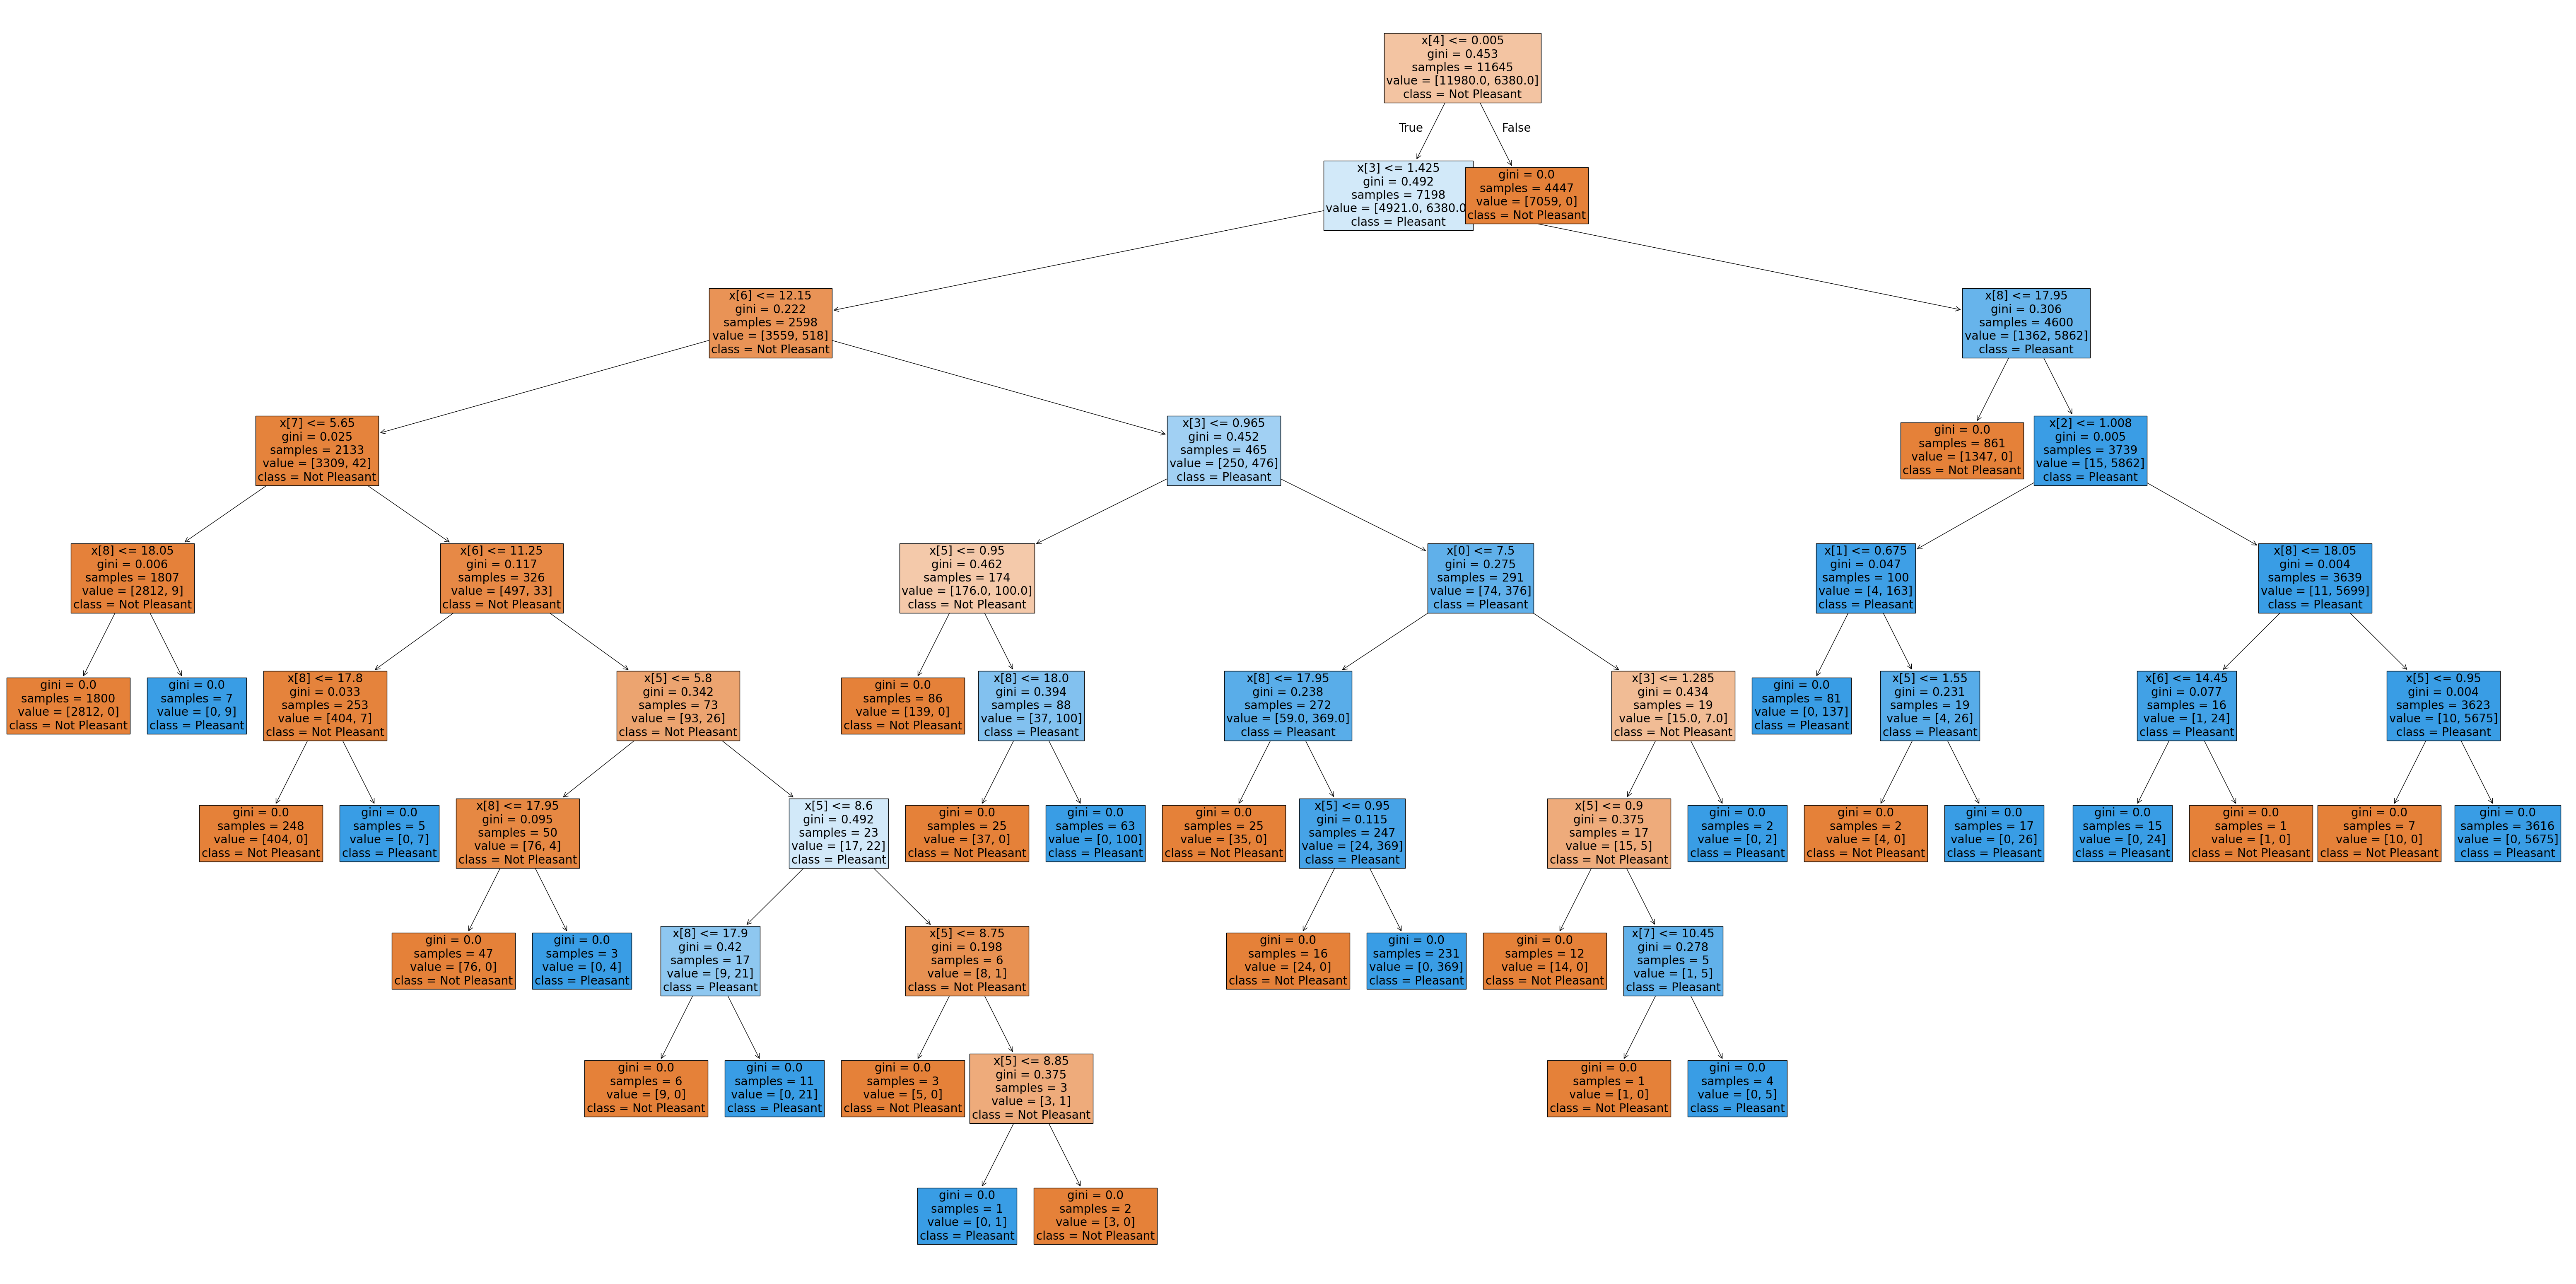

In [46]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[15], fontsize = 20, class_names=bel_labels, filled=True);#, feature_names = X.columns,class_names=['Not Pleasant', "Pleasant"],filled=True); max_depth = 4, 

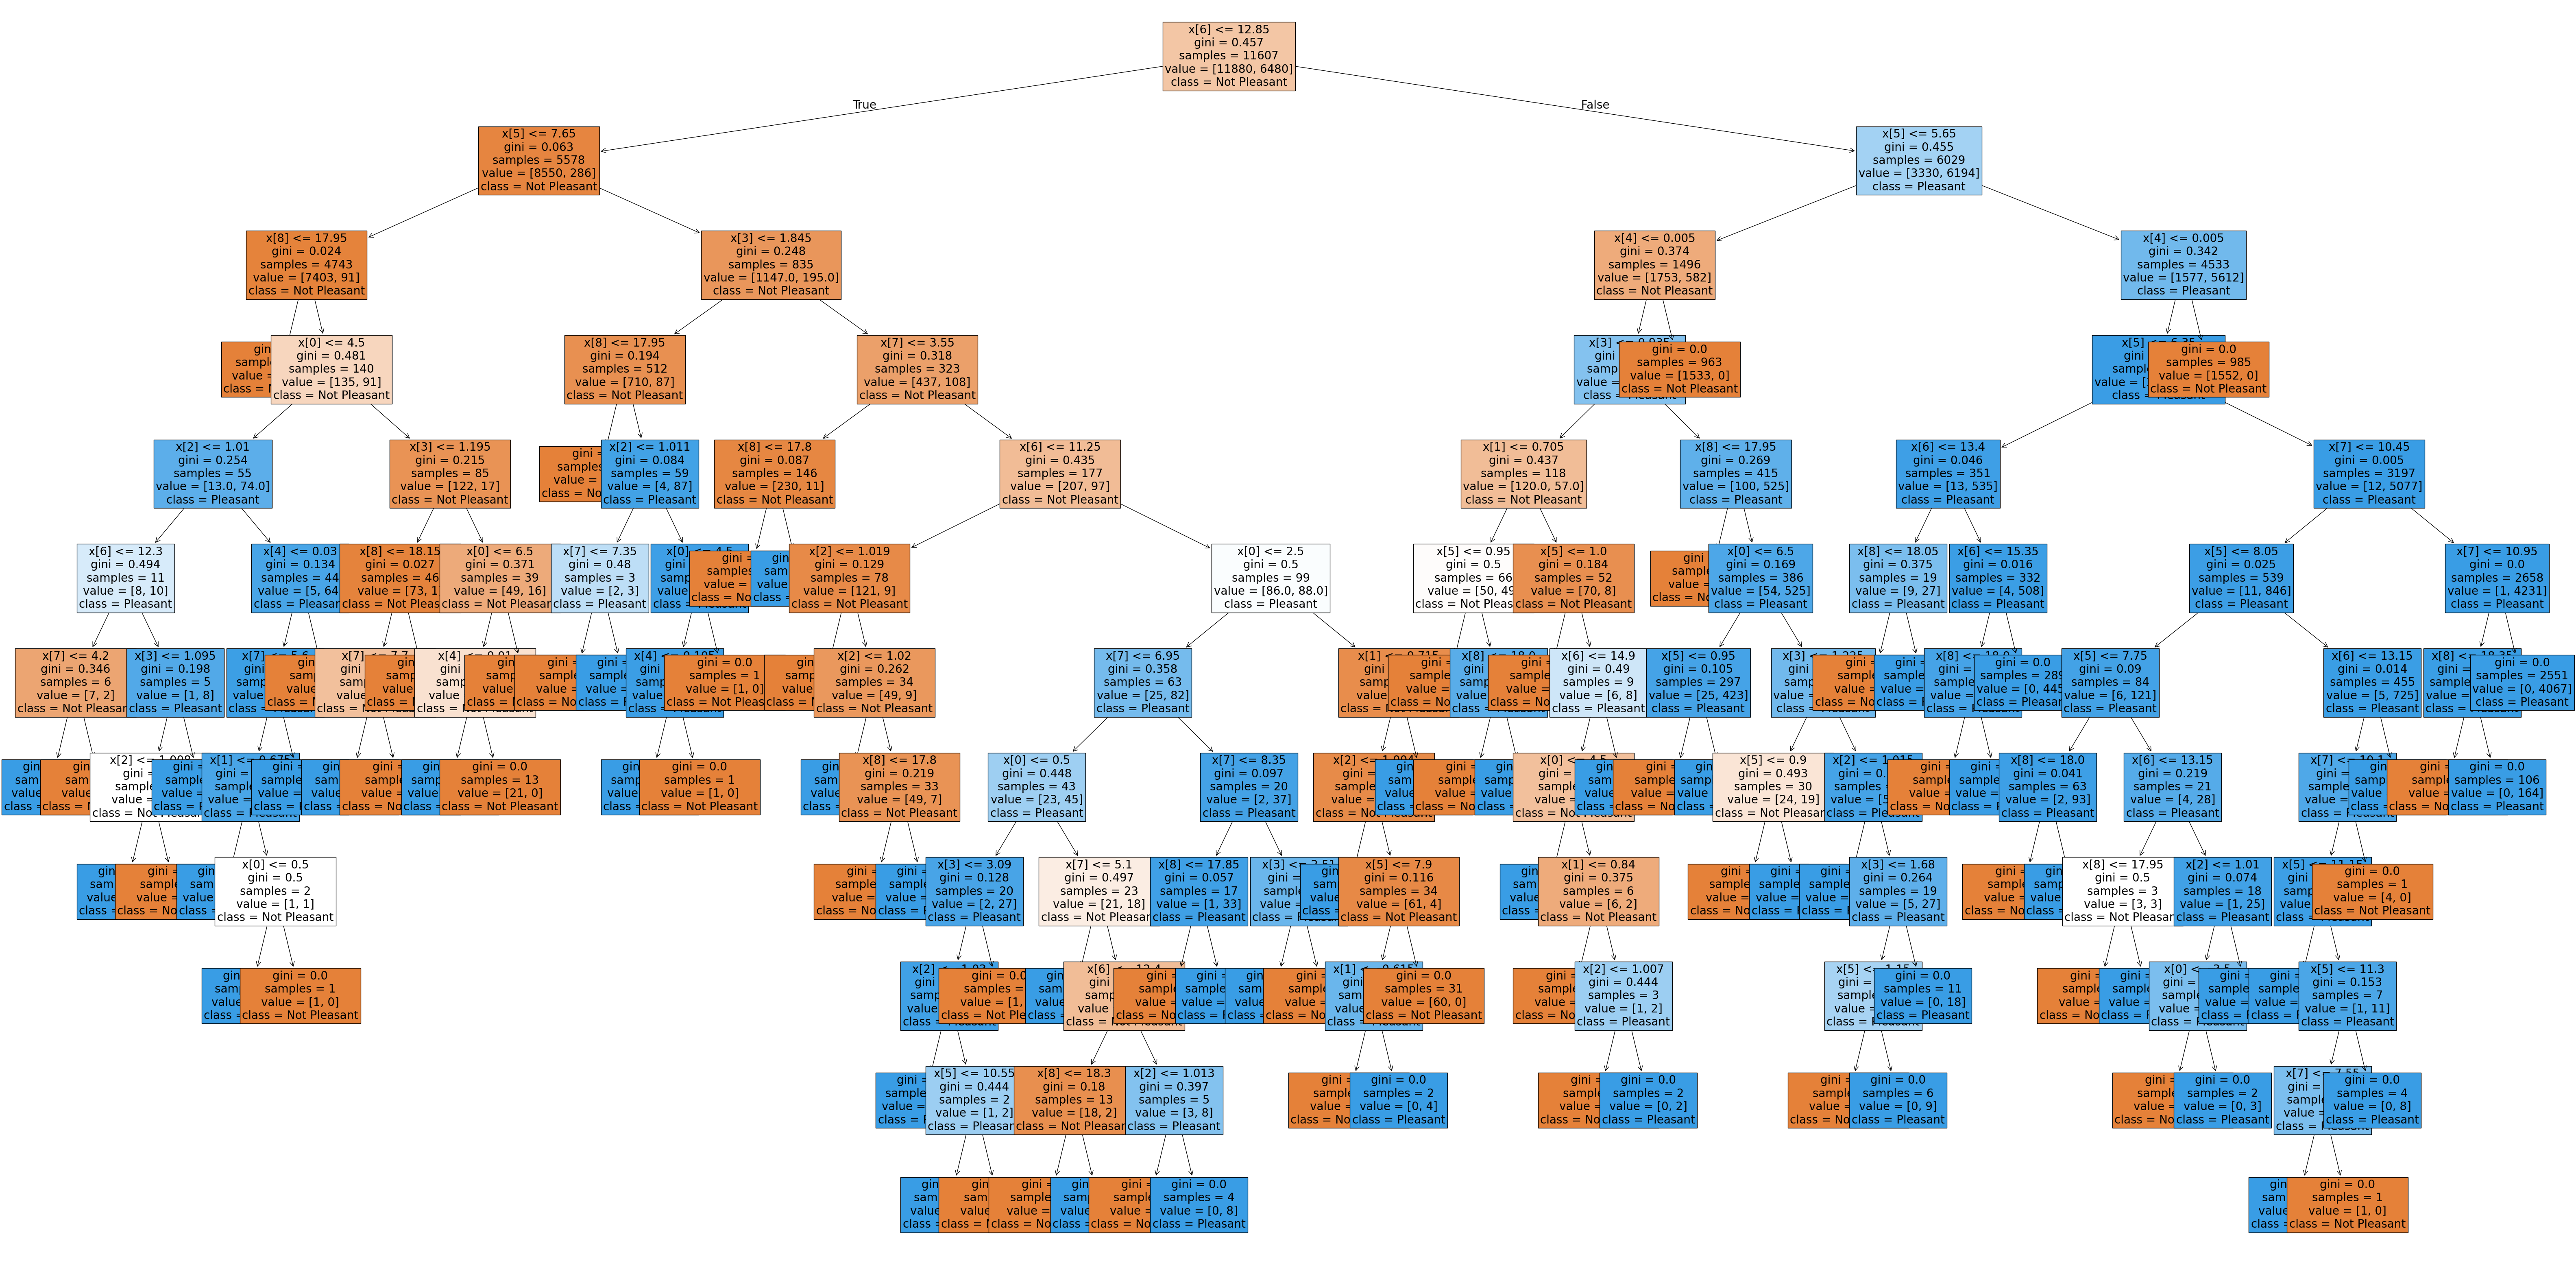

In [48]:
fig = plt.figure(figsize=(80,40))
plot_tree(clf.estimators_[99], fontsize = 20, class_names=bel_labels, filled=True);

---------------------------------------------------------------------------------------------------------------------------
## 6. Conduct feature importances analysis¶
    - Belgrade

In [53]:
np.set_printoptions(threshold=np.inf)
newarray = clf.feature_importances_
print(clf.feature_importances_.shape)
newarray

(9,)


array([0.04353122, 0.0137609 , 0.00858565, 0.02981866, 0.35743514,
       0.08730112, 0.13637285, 0.0444977 , 0.27869675])

In [55]:
np.set_printoptions(threshold=1000)

In [57]:
newarray = newarray.reshape(-1, 1, 9)
print(newarray.shape)
newarray

(1, 1, 9)


array([[[0.04353122, 0.0137609 , 0.00858565, 0.02981866, 0.35743514,
         0.08730112, 0.13637285, 0.0444977 , 0.27869675]]])

In [59]:
sumarray = np.sum(newarray[0], axis=0)
sumarray

array([0.04353122, 0.0137609 , 0.00858565, 0.02981866, 0.35743514,
       0.08730112, 0.13637285, 0.0444977 , 0.27869675])

In [61]:
important = pd.Series(sumarray, index = bel_cols) #.sort_values(ascending = False)
important

BELGRADE_cloud_cover         0.043531
BELGRADE_humidity            0.013761
BELGRADE_pressure            0.008586
BELGRADE_global_radiation    0.029819
BELGRADE_precipitation       0.357435
BELGRADE_sunshine            0.087301
BELGRADE_temp_mean           0.136373
BELGRADE_temp_min            0.044498
BELGRADE_temp_max            0.278697
dtype: float64

Index(['BELGRADE_cloud_cover', 'BELGRADE_humidity', 'BELGRADE_pressure',
       'BELGRADE_global_radiation', 'BELGRADE_precipitation',
       'BELGRADE_sunshine', 'BELGRADE_temp_mean', 'BELGRADE_temp_min',
       'BELGRADE_temp_max'],
      dtype='object')


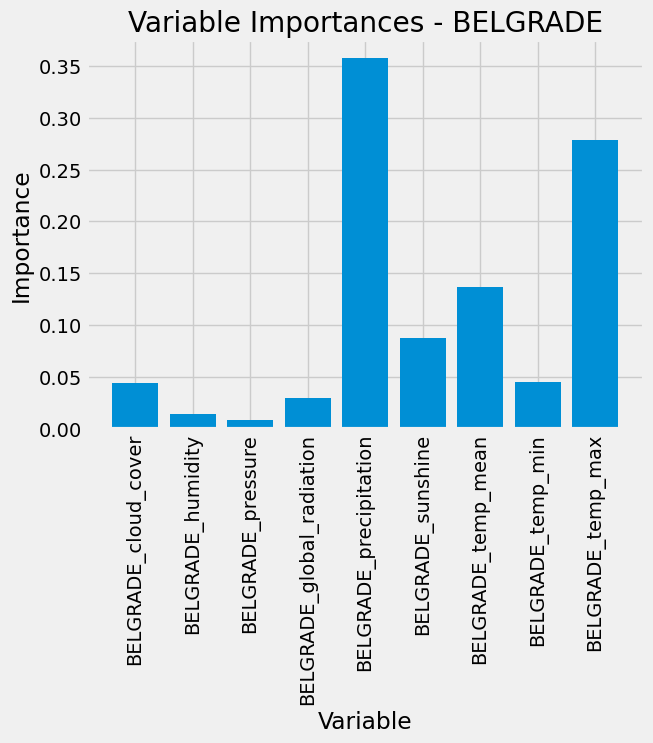

In [63]:
# Conduct variable importances by most influential weather station (feature specific analysis)
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(important)))
print(bel_cols)

plt.bar(x_values, important, orientation = 'vertical')
plt.xticks(x_values, bel_cols, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances - BELGRADE');

- **Notes:** Top features of importances are for BELGRADE weather station are:

        1. Precipitation
        2. Temperature max
        3. Temperature mean

------------------------------